<a href="https://colab.research.google.com/github/hikmat690/AI-programming/blob/main/himatullah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U "tensorflow-text==2.13.*"

In [2]:
import re
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('stopwords')
#nltk.download('punkt_tab')


stopwords.words('english')
exclude = string.punctuation

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Load the CSV file without headers
df = pd.read_csv('/content/smile-annotations.csv', header=0)
# Display the first few rows
print(df.head())


             ID                                              tweet category
0  6.140000e+17  Dorian Gray with Rainbow Scarf #LoveWins (from...    happy
1  6.150000e+17  @SelectShowcase @Tate_StIves ... Replace with ...    happy
2  6.150000e+17  @Sofabsports thank you for following me back. ...    happy
3  6.120000e+17  @britishmuseum @TudorHistory What a beautiful ...    happy
4  6.120000e+17  @NationalGallery @ThePoldarkian I have always ...    happy


In [4]:
df.head()

,ID,tweet,category
0,6.140000e+17,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy
1,6.150000e+17,@SelectShowcase @Tate_StIves ... Replace with ...,happy
2,6.150000e+17,@Sofabsports thank you for following me back. ...,happy
3,6.120000e+17,@britishmuseum @TudorHistory What a beautiful ...,happy
4,6.120000e+17,@NationalGallery @ThePoldarkian I have always ...,happy


In [5]:
df.shape

(3084, 3)

In [6]:
df.head()

,ID,tweet,category
0,6.140000e+17,Dorian Gray with Rainbow Scarf #LoveWins (from...,happy
1,6.150000e+17,@SelectShowcase @Tate_StIves ... Replace with ...,happy
2,6.150000e+17,@Sofabsports thank you for following me back. ...,happy
3,6.120000e+17,@britishmuseum @TudorHistory What a beautiful ...,happy
4,6.120000e+17,@NationalGallery @ThePoldarkian I have always ...,happy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet     100 non-null    object
 1   category  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [7]:
df.isnull().sum()

,0
ID,0
tweet,0
category,0


In [8]:
df.category.value_counts()

,count
category,
nocode,1571
happy,1148
not-relevant,214
angry,70
sad,46
surprise,35


In [9]:
#final classes
df.category.value_counts()

,count
category,
nocode,1571
happy,1148
not-relevant,214
angry,70
sad,46
surprise,35


<ipython-input-10-9bd44cc90bb4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df.category, palette='Spectral')


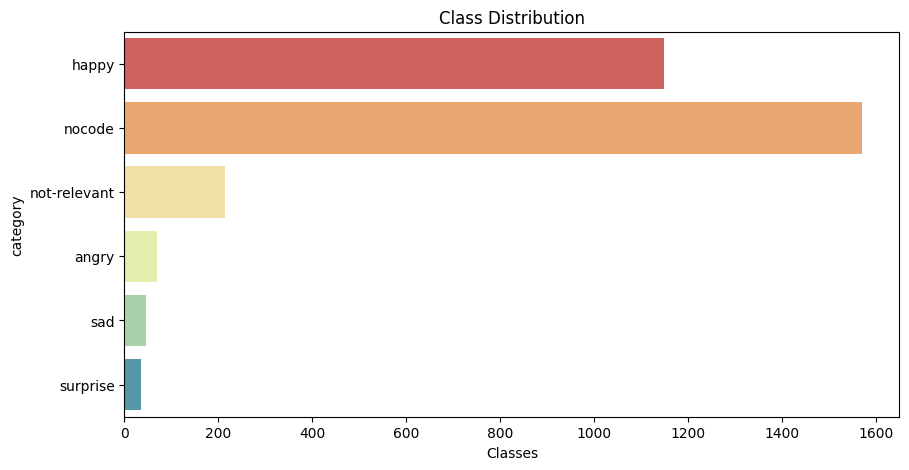

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot class distribution
plt.figure(figsize=(10, 5))
sns.countplot(df.category, palette='Spectral')
plt.xlabel('Classes')
plt.title('Class Distribution');

In [11]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize # Import word_tokenize
nltk.download('punkt_tab')
def preprocess(text):
    text = re.sub(r'(^|\s)@(\w+)', '', text)
    text = re.sub(r'\bhttps?://\S+\b', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()

    tokens = word_tokenize(text) # Now word_tokenize is accessible
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    text = ' '.join(tokens)
    return text

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [12]:
df['tweet'] = df['tweet'].apply(preprocess)

In [13]:
df.head()

,ID,tweet,category
0,6.140000e+17,dorian gray rainbow scarf lovewins,happy
1,6.150000e+17,replace wish artist us next installation entra...,happy
2,6.150000e+17,thank following back great hear diverse amp in...,happy
3,6.120000e+17,beautiful jewel portrait r rex,happy
4,6.120000e+17,always loved painting,happy


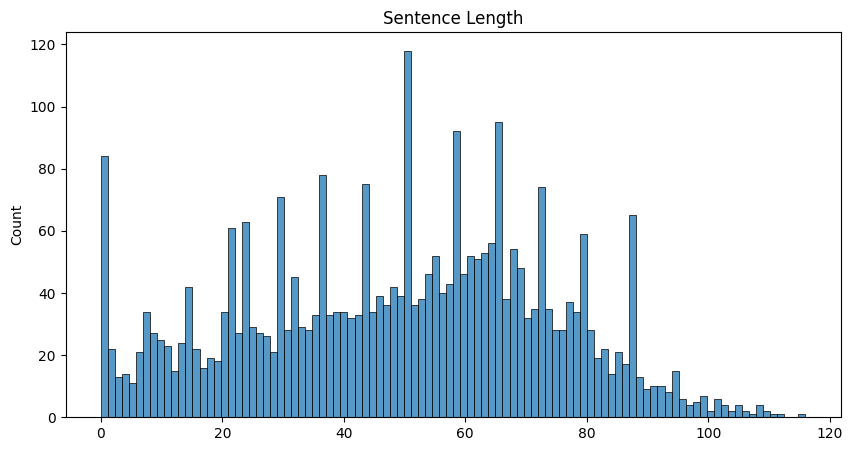

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in df.tweet], bins=100)
plt.title('Sentence Length')
plt.show()

In [15]:
#find the maximum length
max_len = max([len(sent) for sent in df.tweet])
print('Max length: ', max_len)

Max length:  116


In [16]:
df.category.value_counts()

,count
category,
nocode,1571
happy,1148
not-relevant,214
angry,70
sad,46
surprise,35


In [17]:
df

,ID,tweet,category
0,6.140000e+17,dorian gray rainbow scarf lovewins,happy
1,6.150000e+17,replace wish artist us next installation entra...,happy
2,6.150000e+17,thank following back great hear diverse amp in...,happy
3,6.120000e+17,beautiful jewel portrait r rex,happy
4,6.120000e+17,always loved painting,happy
...,...,...,...
3079,6.140000e+17,mt looking forward public engagement event def...,happy
3080,6.130000e+17,upper arm guard,nocode
3081,6.150000e+17,mesmerising,happy
3082,6.130000e+17,nd genocide biafrans promised buhari begundays...,not-relevant


In [18]:
# Map sentiment values to numerical labels
sentiment_mapping = {'nocode': 0, 'happy': 1, 'not-relevant': 2,'angry':3,'sad':4,'surprise':5}
df['sentiment_label'] = df['category'].map(sentiment_mapping)  # Assuming 'Sentiment' is your target column

# X and y are derived from the DataFrame
X = df['tweet']
y = df['sentiment_label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
df.head()

,ID,tweet,category,sentiment_label
0,6.140000e+17,dorian gray rainbow scarf lovewins,happy,1
1,6.150000e+17,replace wish artist us next installation entra...,happy,1
2,6.150000e+17,thank following back great hear diverse amp in...,happy,1
3,6.120000e+17,beautiful jewel portrait r rex,happy,1
4,6.120000e+17,always loved painting,happy,1


In [20]:
# Define BERT model for fine-tuning
preprocessor = hub.KerasLayer("https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3")
encoder = hub.KerasLayer("https://www.kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-l-12-h-768-a-12/versions/4", trainable=True)

# Input layer
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
encoder_inputs = preprocessor(text_input)
outputs = encoder(encoder_inputs)

# Pooled output
pooled_output = outputs["pooled_output"]

# Dropout and classification layers
drop_out = tf.keras.layers.Dropout(0.3, name='dropout')(pooled_output)  # Increased dropout for regularization
output = tf.keras.layers.Dense(6, activation='softmax', name='classifier')(drop_out)  # Updated to 6 classes for multi-class

# Build the model
model = tf.keras.Model(inputs=[text_input], outputs=[output])


In [21]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [29]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
batch_size = 16
epochs = 3
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping]
)


Epoch 1/3
124/124 [==============================] - 3276s 26s/step - loss: 0.9062 - accuracy: 0.6979 - val_loss: 0.6794 - val_accuracy: 0.7713
Epoch 2/3
124/124 [==============================] - 3269s 26s/step - loss: 0.6096 - accuracy: 0.8104 - val_loss: 0.6753 - val_accuracy: 0.7672
Epoch 3/3
124/124 [==============================] - 3299s 27s/step - loss: 0.3884 - accuracy: 0.8713 - val_loss: 0.7471 - val_accuracy: 0.7915


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

 5/20 [======>.......................] - ETA: 4:10